<a href="https://www.kaggle.com/code/kshah105/data-analytics-for-hr?scriptVersionId=128964136" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Installing necessary Library. 
# This Python 3 environment. 
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  
from plotnine import ggplot, aes, geom_density
from statistics import mean
from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/human-resources-data-set/HRDataset_v14.csv


# Data Analytics in HR 
(*Khushboo M Shah*)

I have worked in the HR industry for around 4 years now and often realise analytics has not picked up gears whereas other industries are leveraging data to make stratergic decisions. To that end,this is an effort to showcase how data can be leveraged to answer questions. 

**DATA:** HR data is difficult to find on the web, therefore I turned to Kaggle to use a test data source. 

In this blog post, I will try to answer two different questions from the sample dataset, one descriptive and one predictive to showcase how to make data driven decisions. 
1. The first questions uses various graphs to understand the relationship between job sources and employee performance score. This question will helps answer which job sources yield productive employees. 
2. The second questions uses predictive analytics to understand the pay equity issue with respect to gender. This was just a simple approach to understand the power of statistical models. More complex models can be build and various other variables can be added. 


*Please note this data doesn't relate to any organization. This dataset was created for training purposes.* 

# **QUESTIONS TO ANSWER**:

* What job sources will yield productive employees?
* Is there a pay equity issue with respect to gender?


# **DATA PRE PROCESSING**

In [2]:
#LOADING THE DATASET FROM EXCEL. 
#dataset in a dataframe and printing the first 5 rows. 

df1 = pd.read_csv('/kaggle/input/human-resources-data-set/HRDataset_v14.csv',delimiter=',')
df1.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
#The below code assigns department names to the department ID's.
# Dept ID 1= HR, 2 = IT, 3= Operations, 4= Marketing, 5= Accounting, 6=Sales. 

def AssignDeptNames(row):
    if row == 1:
        return 'Human Resources'
    elif row == 2:
        return 'Information Technology'
    elif row == 3:
        return 'Operations'
    elif row ==4:
        return 'Marketing'
    elif row == 5:
        return 'Accounting'
    else:
        return 'Sales'
    
df1['DeptName'] = df1['DeptID'].map(AssignDeptNames)
#display(df1.head())

In [4]:
#Find the unique values in the Performance Scores column. 
df1.PerformanceScore.unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [5]:
# Assign a numeric value to the Performance Scores column.
# Exceed = 5, Fully Meets = 3, Needs Improvement = 1, PIP = 0

def PerformanceNumericLabels(columnname):
    if columnname =='Exceeds':
        return 5
    elif columnname == 'Fully Meets':
        return 3
    elif columnname== 'Needs Improvement':
        return 1
    else:
        return 0

df1['PerformanceNumericLabels'] = df1['PerformanceScore'].map(PerformanceNumericLabels)
#display(df1.head())

# Q1: What job sources will yield productive employees?


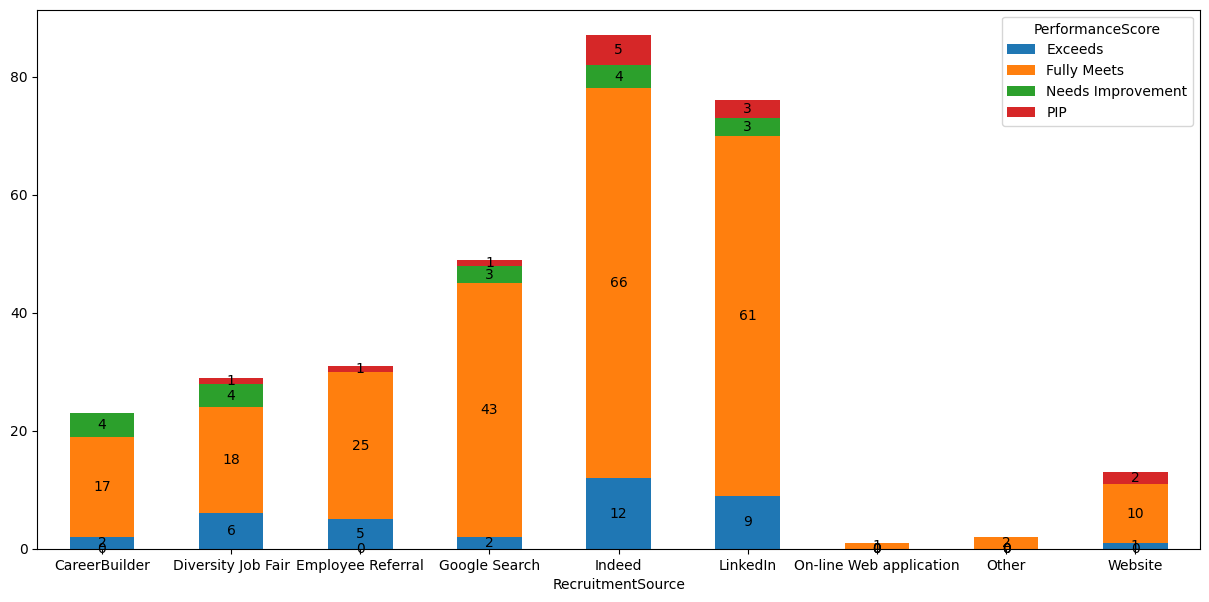

In [6]:
# From which Job source are we getting high performers(Exceeds) and Low Performers(Needs Improvements, PIP)
JobSourceVPerfScore = pd.crosstab(df1.RecruitmentSource, df1.PerformanceScore)

#Plotting a bar chart.
ax = JobSourceVPerfScore.plot(kind='bar',figsize=(15,7),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
    
#The above code plots a stacked bar graph for RecruitmentSource and PerformanceScore.Something very evident is employees with Performance score of "Fully Meets" 
#are coming from Indeed and LinkedIn. Let's dig in a little bit deeper by splitting the below data by departments.
#Look at the Performance score Legend on the left. 

**BAR CHARTS**

The below plots help us answer on which recruitment sources bring quality candidates. Plots between recruitment sources v employee performance scores.

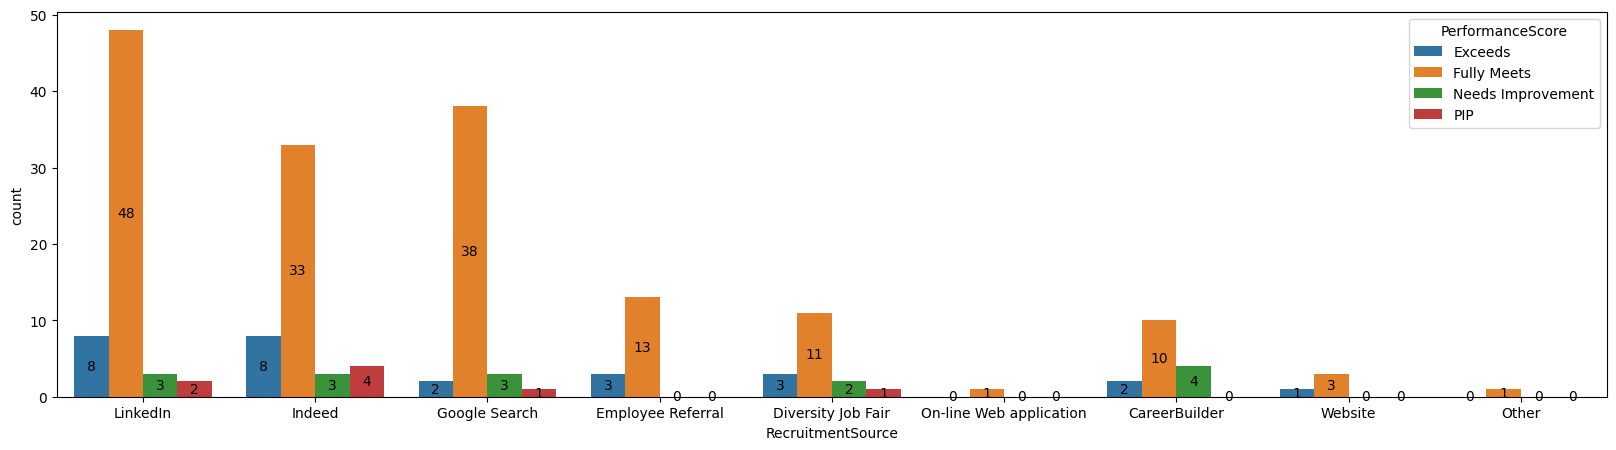

In [7]:
#We will use the same chart as the above but filter the department to Accounting. 
# Bar Plot of Accounting Dept

plt.figure(figsize=(20,5))
Accounting = sns.countplot(x='RecruitmentSource', data=df1[df1['DeptName']=='Accounting'], hue = 'PerformanceScore')
for c in Accounting.containers:
    Accounting.bar_label(c, label_type='center')
    
#WHAT DOES THE BELOW CHART SHOWS US?
#Accounting department has a lot more diversity and are hired from multiple sources. Of the bat, you can employees with "Fully Meets" performance score are coming from
#LinkedIn and Google Search.Something Note worthy is employee hired through "Employee referral" do have "Need Improvement or PIP" as performance score. 

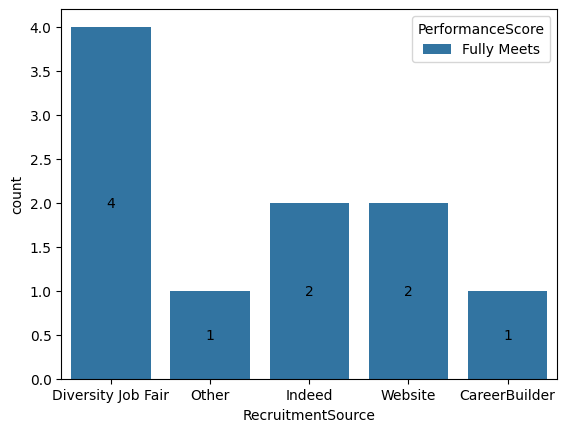

In [8]:
#Stacked Bar Plot for Human Resources
Human_Resources = sns.countplot(x='RecruitmentSource', data=df1[df1['DeptName']=='Human Resources'], hue = 'PerformanceScore')
for c in Human_Resources.containers:
    Human_Resources.bar_label(c, label_type='center')
    
#WHAT DOES THE BELOW CHART SHOWS US?
#No matter where the hire is coming from for the HR department, all employees are able to get a performance score of "Fully Meets". Top sources being Diversity Job Fair,
#Linked and Indeed. Deep dive might be needed to understand why none of the employees have an performance score of "Exceeds". 

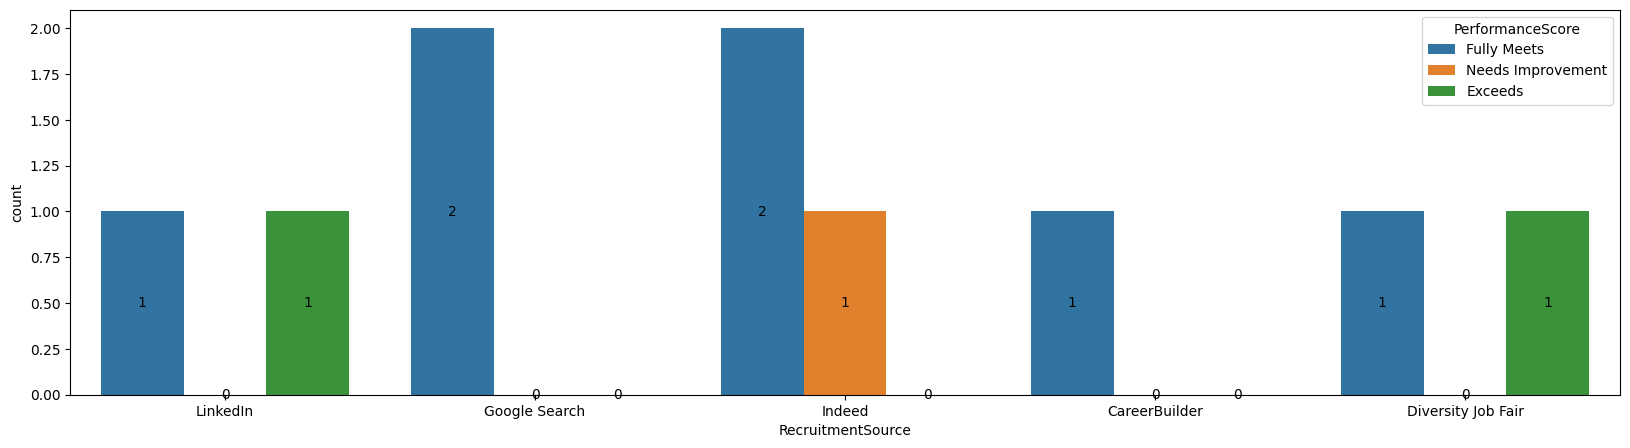

In [9]:
# stacked bar Plot of Marketing Dept
plt.figure(figsize=(20,5))
Marketing = sns.countplot(x='RecruitmentSource', data=df1[df1['DeptName']=='Marketing'], hue = 'PerformanceScore')
for c in Marketing.containers:
    Marketing.bar_label(c, label_type='center')
    
 #WHAT DOES THE BELOW CHART SHOWS US?
#For Marketing, There are very little data to provide insights and also the data has lot more variance. 

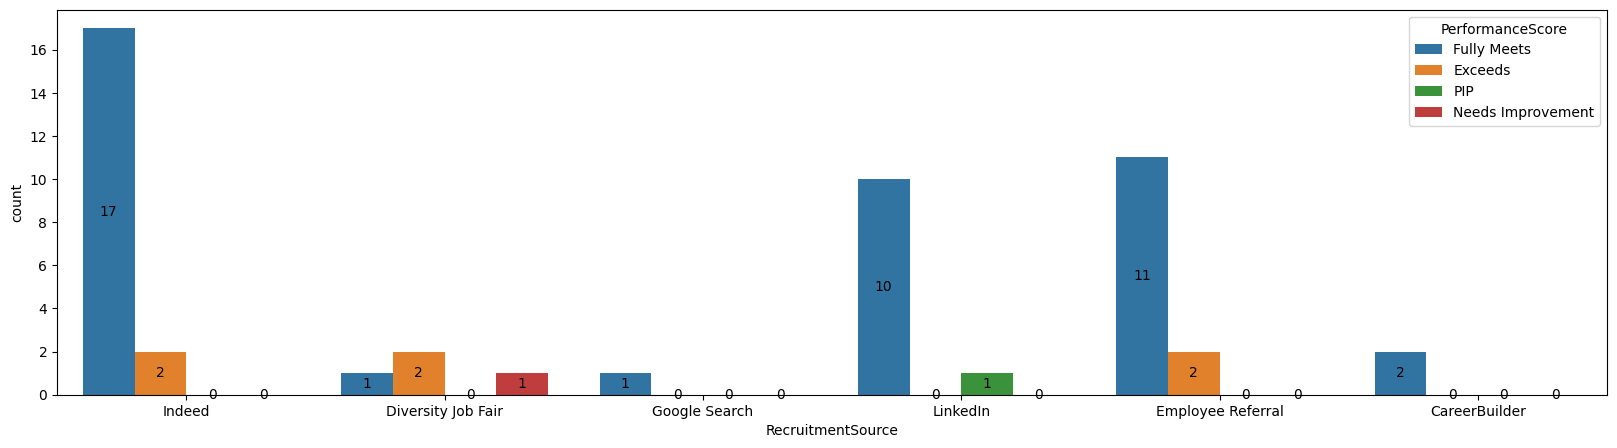

In [10]:
#Plot for Operations
plt.figure(figsize=(20,5))
Operations = sns.countplot(x='RecruitmentSource', data=df1[df1['DeptName']=='Operations'], hue = 'PerformanceScore')
for c in Operations.containers:
    Operations.bar_label(c, label_type='center')
    
    
#WHAT DOES THE BELOW CHART SHOWS US?
#Indeed, LinkedIn and Employee Referral are the top sources for Operations. Few employees fall in exceeds performance evaluation score but all in all they are employee who
# are able to complete the job they were hired for. 

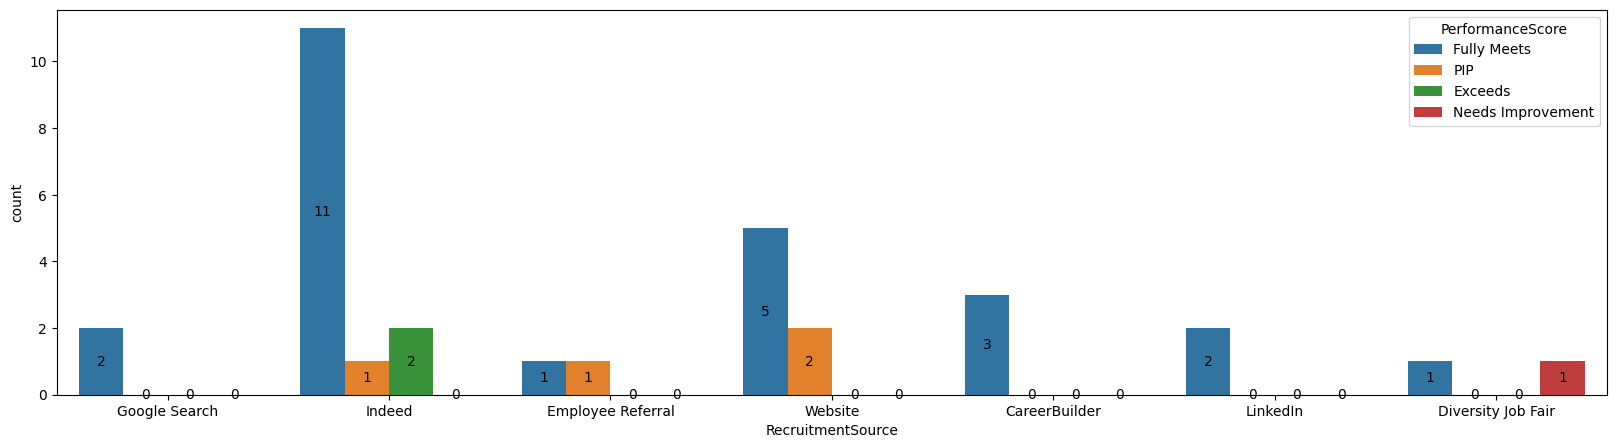

In [11]:
#Plot for Sales
plt.figure(figsize=(20,5))
Sales = sns.countplot(x='RecruitmentSource', data=df1[df1['DeptName']=='Sales'], hue = 'PerformanceScore')
for c in Sales.containers:
    Sales.bar_label(c, label_type='center')
    
#WHAT DOES THE BELOW CHART SHOWS US?
#Indeed and Website works well for Sales Department.

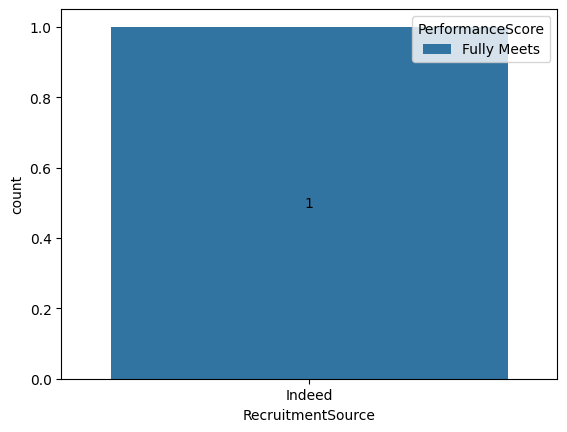

In [12]:
#Plot for Information Technology
Information_Technology = sns.countplot(x='RecruitmentSource', data=df1[df1['DeptName']=='Information Technology'], hue = 'PerformanceScore')
for c in Information_Technology.containers:
    Information_Technology.bar_label(c, label_type='center')

#WHAT DOES THE BELOW CHART SHOWS US?
#There is one just employee in Information technology department. 

**Insights**: 
*  ~75% of the candidates who get a performance score of "Fully Meets" are coming from Indeed followed by Linkedin.
*  Hires from Indeed and Linkedin will help the overall organization be productive.
*  Accounting hires are strong when come from employee referrals
*  All job sources for human resources are strong.
*  Sales hires are strong when they come from Indeed and Website.
* Employee Referral job source is considered to the strongest. 

**NEXT STEPS:** One other metric that would be helpful would be the Quality of Hire.

# Q2:  Is there a pay equity issue with respect to gender?


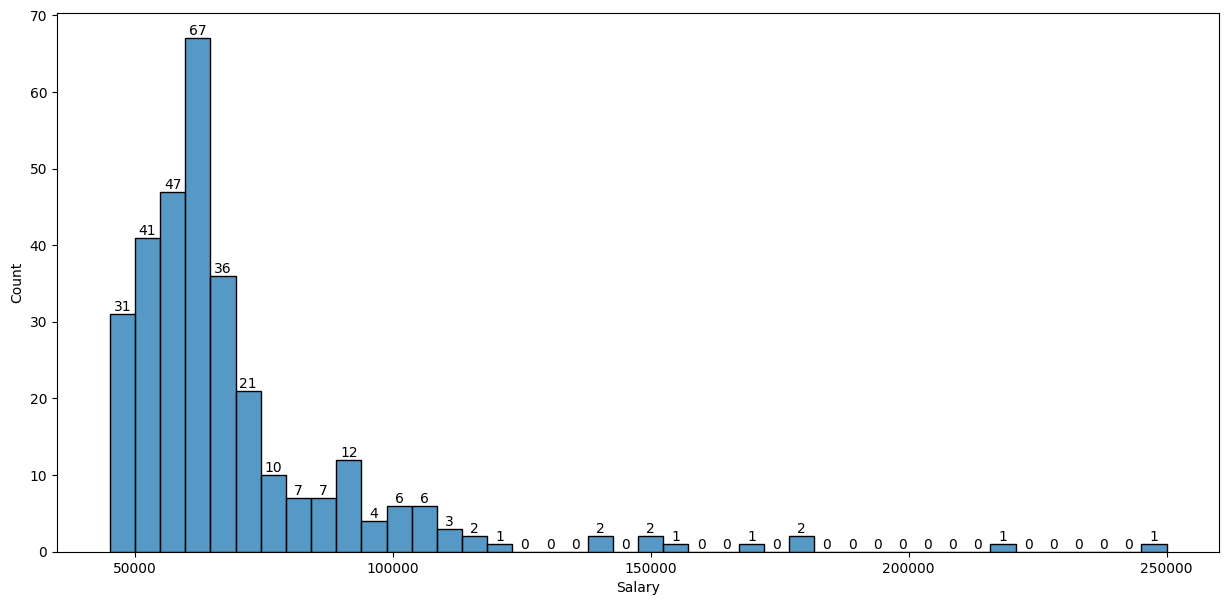

In [13]:
# Plot a histrogram to understand the distribution of the salaries.

plt.figure(figsize = (15,7))
ax = sns.histplot(df1.Salary)
for c in ax.containers:
    ax.bar_label(c,label_type = 'edge')
    
#Most of the salaries are centered between $60,000 - $80,000

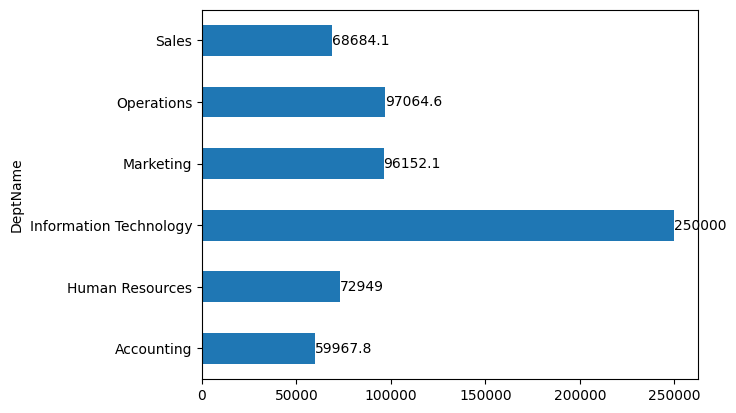

In [14]:
#What is the average of the salaries by departments? The below graph depicts that.
MeanOfSalaries = df1.groupby('DeptName')['Salary'].mean()

ax1 = MeanOfSalaries.plot(kind = "barh")
for c in ax1.containers:
    ax1.bar_label(c,label_type = 'edge')

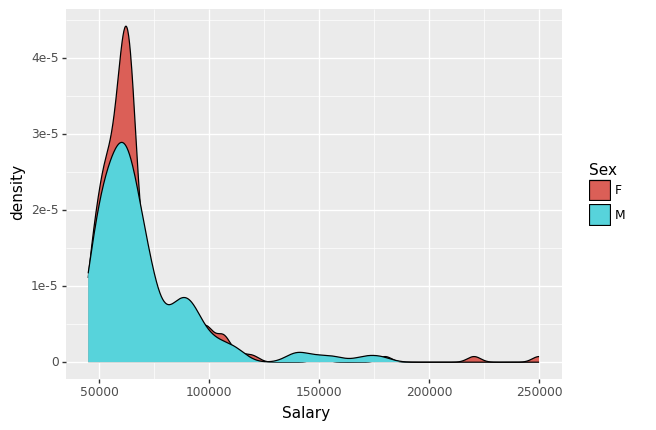

<ggplot: (8684022967684)>

In [15]:
#Understanding the differences in pay by gender by plotting a bell curve. 
Male = df1[df1['Sex'] == "M"]
Female = df1[df1['Sex'] == "F"]

ggplot(data = df1, mapping = aes(x = 'Salary', fill = 'Sex')) +  geom_density()

From the above it is clear that Males are paid more than Female but by how much. Let's now look at unadjusted pay gap them. 

In [16]:
#Average salaries for Male and Female to find the unadjusted Pay gap for Males and Females. 

AvgSalariesBySex = df1.groupby('Sex')['Salary'].mean()
print(AvgSalariesBySex)

unadjusted_pay_gap = 70629.4 - 67786.7
print("Unadjusted pay gap for Females is",unadjusted_pay_gap)

Sex
F     67786.727273
M     70629.400000
Name: Salary, dtype: float64
Unadjusted pay gap for Females is 2842.699999999997


This means the organization pays females $2843 less than men. However, this metric is unadjusted for various factors that are known to affect salary, including job level, tenure, previous work experience, and more. Therefore, looking at unadjusted pay gaps is often not as informative as you’d like it to be.

We won't have information on eveything and there will be random noise in the data. We will use statiscal model to control all salary drivers and isolate the effect of gender. 

In [17]:
#MODEL 1: This is a naive regression model because it assumes that only gender affects your employees salary. 
# Y= Salary, X = Sex

import statsmodels.api as sm
X= df1.GenderID
Y = df1.Salary
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.401
Model:                            OLS   Adj. R-squared (uncentered):              0.399
Method:                 Least Squares   F-statistic:                              207.9
Date:                Wed, 10 May 2023   Prob (F-statistic):                    2.03e-36
Time:                        01:20:51   Log-Likelihood:                         -3846.0
No. Observations:                 311   AIC:                                      7694.
Df Residuals:                     310   BIC:                                      7698.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GenderID    7.063e+04   4898.724     14.418      0.000     6.1e+04    8.03e+04
==============================================================================
Omnibus:                       36.001   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.946
Skew:                           0.625   Prob(JB):                     2.38e-16
Kurtosis:                       4.998   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

****Understanding the Output:
1. **R- Squared:** (40%):This statistic explains the % variation in salary(Y) by Gender(X). The drwaback of this variable is it increases with numbers of dependent variables(X). 
2. **Adj R-Squared:** (39%): This a modified R-Squared. The value only increases when an additional variable(X) adds explanatory power to the regression. 
3. **Prob(F-Statistic):** Tells you the significance of the regression. Probability is close to zero, This implies that overall the regressions is meaningful. 
4. **P values for GenderID:** Since the p-value is equal to 0.00, GenderID is statistically significant meaning the results in the data are not explainable by chance alone.  

# Future models and next steps
More complicated models can be created to determine the effect of Age, Education, Performance Score on Salaries.

**NOTE:** Not all factors that influence salary might have a linear effect. 
For example, while your policy may cause the salaries of new hires to grow rapidly,employees might reach their salary-bound cap when they have longer tenure.

Running a pay gap analysis for specific subgroups like job levels or departments, or by adding interaction terms to your general analysis.